In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [99]:
# Importing base_111 file
base = pd.read_csv("base_111.csv", encoding="latin-1")
# base2 = pd.read_csv("base_222.csv", encoding="latin-1")
# base265 = pd.read_csv("base_265.csv", encoding="latin-1")
dup_init = base.shape[0]
base = base.drop_duplicates()
dup_final = base.shape[0]
print(dup_init - dup_final)


cod_init = base.shape[0]
base = base[base['COD'] == 111]
cod_final = base.shape[0]
print(cod_init - cod_final)

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


21251
2556


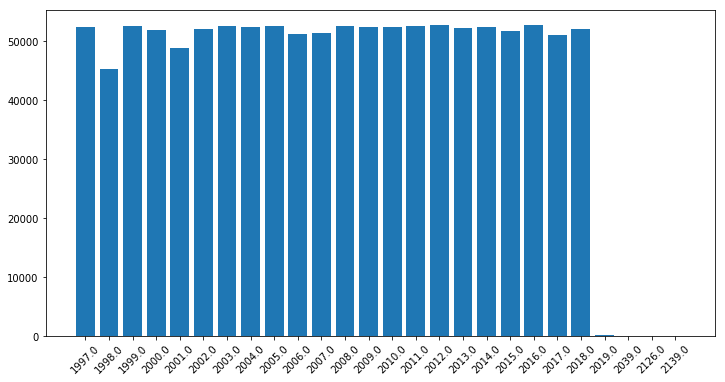

In [58]:
volumetry = base.drop_duplicates().groupby('YEAR').agg({'DAY365': 'count'}).reset_index()

fig = plt.figure(figsize=(12, 6))
# plt.title("Volumetria base original")
N = np.arange(len(volumetry['DAY365']))
plt.bar(N,volumetry['DAY365'].values)
plt.xticks(N,volumetry['YEAR'],rotation = 45)
# plt.savefig("fig/CEPAGRI_volumetria")
plt.show()

In [115]:
missing_years = []
for v in base['YEAR'].unique():
    if(base[base['YEAR'] == v]['DAY365'].nunique() < 365):
        print(f"The year {v} has {365 - base[base['YEAR'] == v]['DAY365'].nunique()} missing days ")
        if(v < 2019):
            missing_years.append(v)

The year 1998.0 has 49 missing days 
The year 2000.0 has 2 missing days 
The year 2001.0 has 24 missing days 
The year 2002.0 has 1 missing days 
The year 2006.0 has 9 missing days 
The year 2007.0 has 7 missing days 
The year 2019.0 has 364 missing days 
The year 2039.0 has 364 missing days 
The year 2126.0 has 364 missing days 
The year 2139.0 has 364 missing days 
The year 2013.0 has 1 missing days 
The year 2015.0 has 4 missing days 
The year 2017.0 has 7 missing days 
The year 2018.0 has 2 missing days 


So years 1998. 2000, 2001, 2002, 2006, 2007, 2013, 2015, 2017 and 2018 doesn't have all days

In [113]:
24*6*365

52560

In [114]:
24*6

144

In [110]:
missing_days = []
for y in missing_years:
    missing_days.append([i for i in np.arange(1,366) if i not in base[base['YEAR'] == y].DAY365.unique()])
    print(f"Year: {y} missing days: {[i for i in np.arange(1,366) if i not in base[base['YEAR'] == y].DAY365.unique()]}")

Year: 1998.0 missing days: [47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]
Year: 2000.0 missing days: [361, 362, 365]
Year: 2001.0 missing days: [1, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281]
Year: 2002.0 missing days: [253]
Year: 2006.0 missing days: [144, 145, 146, 147, 148, 149, 150, 151, 152]
Year: 2007.0 missing days: [319, 320, 321, 322, 323, 324, 325]
Year: 2013.0 missing days: [209]
Year: 2015.0 missing days: [17, 18, 172, 173]
Year: 2017.0 missing days: [70, 71, 119, 120, 121, 122, 124]
Year: 2018.0 missing days: [300, 301]


# Describe data

In [60]:
base.shape

(1138228, 18)

In [61]:
base.describe()

,COD,YEAR,DAY365,MINUTE2400,N_WNDVEL_5M,N_WNDVEL_2M,N_WNDDIR_DEGREE,N_INCRAD_10MSR,N_REFRAD_10MSR,N_PHTFLOW_10MSR,N_NHTFLOW_10MSR,N_AIRMTR_PCT10,N_AIRTMP_MED10,N_GRDTMP_3CM,N_GRDTMP_6CM,N_PRESSION_HPA
count,1138228.0,1.138228e+06,1.138228e+06,1.138228e+06,1.138228e+06,1.138228e+06,1.138228e+06,1.138228e+06,1.138228e+06,1.138228e+06,1.138228e+06,1.138227e+06,1.138227e+06,1.138227e+06,1.138227e+06,1.138227e+06
mean,111.0,2.007567e+03,1.834570e+02,1.191838e+03,1.338263e+03,8.314822e+02,2.618663e+02,7.067442e+02,2.609247e+02,3.430510e+02,-2.136187e+03,7.328247e+01,2.550711e+01,1.834196e+03,1.804436e+03,9.460472e+02
std,0.0,6.320072e+00,1.054385e+02,6.928361e+02,1.358013e+03,1.112740e+03,6.423705e+02,1.551437e+03,8.563209e+02,1.135954e+03,3.071974e+03,2.626834e+01,2.306265e+02,3.060298e+03,3.042039e+03,7.980961e+01
min,111.0,1.997000e+03,-5.336000e+01,1.000000e+01,-6.999000e+03,0.000000e+00,0.000000e+00,-6.999000e+03,0.000000e+00,0.000000e+00,-6.999000e+03,-6.999000e+03,-6.999000e+03,-6.999000e+03,-6.999000e+03,-6.999000e+03
25%,111.0,2.002000e+03,9.300000e+01,6.100000e+02,1.010000e+00,5.390000e-01,9.450000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-6.999000e+03,5.973000e+01,1.817000e+01,2.092000e+01,2.158000e+01,9.420000e+02
50%,111.0,2.008000e+03,1.840000e+02,1.210000e+03,1.285000e+03,1.253000e+00,1.554000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-2.749000e+02,7.660000e+01,2.114000e+01,2.526000e+01,2.556000e+01,9.460000e+02
75%,111.0,2.013000e+03,2.750000e+02,1.810000e+03,2.187000e+03,1.594000e+03,2.531000e+02,3.541250e+02,1.563000e+01,9.940000e+01,0.000000e+00,8.840000e+01,2.511000e+01,6.999000e+03,6.999000e+03,9.510000e+02
max,111.0,2.139000e+03,6.540000e+02,6.640000e+03,6.996000e+03,6.999000e+03,6.999000e+03,6.999000e+03,6.999000e+03,6.999000e+03,0.000000e+00,6.836000e+03,1.822660e+05,6.999000e+03,6.999000e+03,2.802000e+03


Here we can see that there are a few values inconsistent, like negative value for "Day's variable"

In [62]:
#Counting 0 value for Day variable
base[base['DAY365'] <1 ]['YEAR'].nunique()

2

In [63]:
#Looking these values
base[base['DAY365'] <1 ]['DAY365'].unique()

array([-53.36,   0.  ])

In [64]:
#Looking which Years tehse inconsistent values exist
base[base['DAY365'] <1 ]['YEAR'].unique()

array([ 2019.,  2000.])

Also there are values above 366 in Day Variable

In [65]:
#Looking
base[base['DAY365'] > 366 ]['DAY365'].unique()

array([ 388.,  654.])

In [66]:
#Looking years of occurence
base[base['DAY365'] > 366 ]['YEAR'].unique()

array([ 2039.,  2139.])

Since out datasets are from 1997 to 2017 values above 2017 are also inconsistent

In [67]:
#Couting inconsistent values
base[base['YEAR']> 2018]['YEAR'].nunique()

4

In [68]:
#Looking these values
base[base['YEAR']> 2018]['YEAR'].unique()

array([ 2019.,  2039.,  2126.,  2139.])

Other variable with directly notable inconsistent values is "Hora - Minuto" that is hour variable, it is limited from 0 to 2400

In [69]:
#counting
base[base['MINUTE2400']> 2400]['MINUTE2400'].nunique()

1

In [70]:
#looking
base[base['MINUTE2400']> 2400]['MINUTE2400'].unique()

array([ 6640.])

All these values will be tagged to future treatment

# Missing values

In [71]:
base.isnull().sum()

COD                0
YEAR               0
DAY365             0
MINUTE2400         0
N_WNDVEL_5M        0
N_WNDVEL_2M        0
N_WNDDIR_DEGREE    0
N_INCRAD_10MSR     0
N_REFRAD_10MSR     0
N_PHTFLOW_10MSR    0
N_NHTFLOW_10MSR    0
N_AIRMTR_PCT10     1
N_AIRTMP_MED10     1
N_GRDTMP_3CM       1
N_GRDTMP_6CM       1
N_GRDTMP_UV        1
N_PRESSION_HPA     1
N_RAIN_SUM10       1
dtype: int64

In [72]:
#Counting all
base.isnull().sum().sum()

7

These values will be also tagged later

# Fixing inconsistent values

In [73]:
#Function to fix year variable
def fix_year(anos):
    if(anos in [2019, 2039, 2126, 2139]):
        return -999
    else:
        return anos

In [74]:
base['YEAR'] = base['YEAR'].map(fix_year)

In [75]:
#Function to fix hour variable
def fix_hour(hours):
    if(hours == 6640):
        return -999
    else:
        return hours

In [76]:
base["MINUTE2400"] = base["MINUTE2400"].map(fix_hour)

In [77]:
#Function to fix day variable
def fix_day(days):
    if((days<1) | (days > 366)):
        return -999
    else:
        return days

In [78]:
base["DAY365"] = base["DAY365"].map(fix_day)

In [79]:
base = base.dropna();

In [80]:
base.shape

(1138227, 18)

# Checking data consistency

In [81]:
base.isnull().sum()

COD                0
YEAR               0
DAY365             0
MINUTE2400         0
N_WNDVEL_5M        0
N_WNDVEL_2M        0
N_WNDDIR_DEGREE    0
N_INCRAD_10MSR     0
N_REFRAD_10MSR     0
N_PHTFLOW_10MSR    0
N_NHTFLOW_10MSR    0
N_AIRMTR_PCT10     0
N_AIRTMP_MED10     0
N_GRDTMP_3CM       0
N_GRDTMP_6CM       0
N_GRDTMP_UV        0
N_PRESSION_HPA     0
N_RAIN_SUM10       0
dtype: int64

In [82]:
base[(base['DAY365'] <1 ) & (base['DAY365']!=-999)]['YEAR'].nunique()

0

In [83]:
base[base['YEAR']> 2018]['YEAR'].nunique()

0

In [84]:
base[base['MINUTE2400']> 2400]['MINUTE2400'].nunique()

0

# Treatment of variables with non numerical data, where it should be

In [85]:
vars_ = base.columns

In [86]:
for v in vars_: 
    try:
        base[v] = base[v].astype(float)
    except ValueError:
    #Handle the exception
        print("Theres is non numerical data in variable : ", v)

Theres is non numerical data in variable :  N_GRDTMP_UV
Theres is non numerical data in variable :  N_RAIN_SUM10


In [87]:
#Fixing these values

base['N_GRDTMP_UV'] = pd.to_numeric(base['N_GRDTMP_UV'], errors='coerce')
base['N_RAIN_SUM10']= pd.to_numeric(base['N_RAIN_SUM10'], errors = 'coerce')

In [88]:
base = base.dropna();

In [89]:
base.isnull().sum()

COD                0
YEAR               0
DAY365             0
MINUTE2400         0
N_WNDVEL_5M        0
N_WNDVEL_2M        0
N_WNDDIR_DEGREE    0
N_INCRAD_10MSR     0
N_REFRAD_10MSR     0
N_PHTFLOW_10MSR    0
N_NHTFLOW_10MSR    0
N_AIRMTR_PCT10     0
N_AIRTMP_MED10     0
N_GRDTMP_3CM       0
N_GRDTMP_6CM       0
N_GRDTMP_UV        0
N_PRESSION_HPA     0
N_RAIN_SUM10       0
dtype: int64

In [90]:
((base == -1000) | (base == -999)).sum()

COD                  0
YEAR               128
DAY365             131
MINUTE2400           1
N_WNDVEL_5M          0
N_WNDVEL_2M          0
N_WNDDIR_DEGREE      0
N_INCRAD_10MSR       0
N_REFRAD_10MSR       0
N_PHTFLOW_10MSR      0
N_NHTFLOW_10MSR     17
N_AIRMTR_PCT10       0
N_AIRTMP_MED10       0
N_GRDTMP_3CM         0
N_GRDTMP_6CM         0
N_GRDTMP_UV          0
N_PRESSION_HPA       0
N_RAIN_SUM10         0
dtype: int64

In [91]:
clean_base = base[((base != -1000) & (base != -999))]
clean_base = clean_base.dropna();

In [92]:
# Here we export our main resulted dataset of this code
clean_base['YEAR'] = clean_base['YEAR'].astype(int)
clean_base.to_csv("clean_base111.csv", index = False)

In [93]:
clean_base.isnull().sum()

COD                0
YEAR               0
DAY365             0
MINUTE2400         0
N_WNDVEL_5M        0
N_WNDVEL_2M        0
N_WNDDIR_DEGREE    0
N_INCRAD_10MSR     0
N_REFRAD_10MSR     0
N_PHTFLOW_10MSR    0
N_NHTFLOW_10MSR    0
N_AIRMTR_PCT10     0
N_AIRTMP_MED10     0
N_GRDTMP_3CM       0
N_GRDTMP_6CM       0
N_GRDTMP_UV        0
N_PRESSION_HPA     0
N_RAIN_SUM10       0
dtype: int64

In [94]:
clean_base.shape

(1138003, 18)

In [97]:
1 - 1138003/1138228

0.00019767568536355196